In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [67]:
data = pd.read_csv('Churn_Modelling.csv')

In [68]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [70]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### split dataset into dependent & independent

In [72]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [73]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


#### Feature engineering

In [74]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

##### Concate with main data set

In [75]:
X =X.drop(['Gender','Geography'],axis=1)

In [76]:
X = pd.concat([X,gender,geography], axis=1)

In [77]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1


### Train Test split

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
X_train


array([[-0.23290937,  0.01327717,  1.03405347, ..., -1.09720406,
        -0.57754272,  1.74426078],
       [ 0.87701484, -1.04027661, -1.04863227, ..., -1.09720406,
        -0.57754272,  1.74426078],
       [-1.08590669,  1.3541638 , -0.0072894 , ...,  0.91140749,
         1.73147365, -0.57330877],
       ...,
       [-0.2637406 , -0.65716614,  0.68693918, ...,  0.91140749,
        -0.57754272,  1.74426078],
       [-1.42505019,  0.30061002,  1.38116776, ...,  0.91140749,
         1.73147365, -0.57330877],
       [-1.26061698, -1.61494231, -0.0072894 , ...,  0.91140749,
         1.73147365, -0.57330877]])

In [81]:
X_test

array([[-1.28117113, -0.75294376, -0.0072894 , ...,  0.91140749,
         1.73147365, -0.57330877],
       [-0.54122166, -0.36983329,  1.03405347, ...,  0.91140749,
        -0.57754272, -0.57330877],
       [-1.11673791,  2.69505044,  1.72828204, ...,  0.91140749,
        -0.57754272, -0.57330877],
       ...,
       [ 0.80507531, -0.94449899, -0.0072894 , ...,  0.91140749,
         1.73147365, -0.57330877],
       [ 0.10623413,  0.20483241, -0.0072894 , ..., -1.09720406,
        -0.57754272,  1.74426078],
       [ 2.04860151, -0.94449899,  0.33982489, ...,  0.91140749,
        -0.57754272, -0.57330877]])

In [82]:
X_train.shape

(8000, 11)

In [83]:
X_test.shape

(2000, 11)

### ANN

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [96]:
classifier = Sequential()
#adding input layer
classifier.add(Dense(units=11,activation='relu'))
#adding first hidden layer
classifier.add(Dense(units=8,activation='relu'))
# add dropout
classifier.add(Dropout(0.2))
#adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
# add dropout
classifier.add(Dropout(0.2))
#adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [97]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [98]:
#if the learning rate needs to be initialized manually
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [99]:
#For early stop during the training

early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [100]:
model_history = classifier.fit(X_train,y_train,validation_split=0.3, batch_size=10, epochs=200,callbacks=early_stop)

Epoch 1/200
560/560 [==============================] - 3s 4ms/step - loss: 0.5301 - accuracy: 0.7880 - val_loss: 0.4574 - val_accuracy: 0.7883
Epoch 2/200
560/560 [==============================] - 2s 3ms/step - loss: 0.4700 - accuracy: 0.7980 - val_loss: 0.4345 - val_accuracy: 0.7883
Epoch 3/200
560/560 [==============================] - 2s 3ms/step - loss: 0.4568 - accuracy: 0.8005 - val_loss: 0.4262 - val_accuracy: 0.7908
Epoch 4/200
560/560 [==============================] - 2s 3ms/step - loss: 0.4505 - accuracy: 0.8048 - val_loss: 0.4206 - val_accuracy: 0.8033
Epoch 5/200
560/560 [==============================] - 2s 3ms/step - loss: 0.4378 - accuracy: 0.8130 - val_loss: 0.4126 - val_accuracy: 0.8154
Epoch 6/200
560/560 [==============================] - 2s 3ms/step - loss: 0.4334 - accuracy: 0.8139 - val_loss: 0.4083 - val_accuracy: 0.8213
Epoch 7/200
560/560 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.8204 - val_loss: 0.3997 - val_accuracy: 0.8296

Epoch 58/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3588 - accuracy: 0.8512 - val_loss: 0.3369 - val_accuracy: 0.8562
Epoch 59/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3601 - accuracy: 0.8500 - val_loss: 0.3375 - val_accuracy: 0.8592
Epoch 60/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3599 - accuracy: 0.8466 - val_loss: 0.3372 - val_accuracy: 0.8562
Epoch 61/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3577 - accuracy: 0.8504 - val_loss: 0.3370 - val_accuracy: 0.8558
Epoch 62/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3559 - accuracy: 0.8523 - val_loss: 0.3355 - val_accuracy: 0.8583
Epoch 63/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3626 - accuracy: 0.8482 - val_loss: 0.3401 - val_accuracy: 0.8562
Epoch 64/200
560/560 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.8514 - val_loss: 0.3350 - val_accuracy:

In [101]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

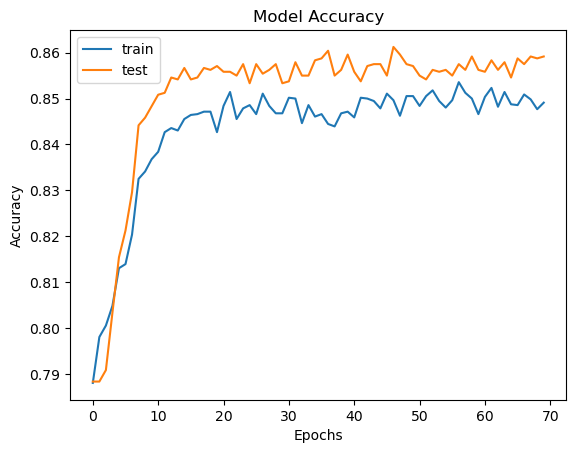

In [102]:
#visualizing the graph of accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

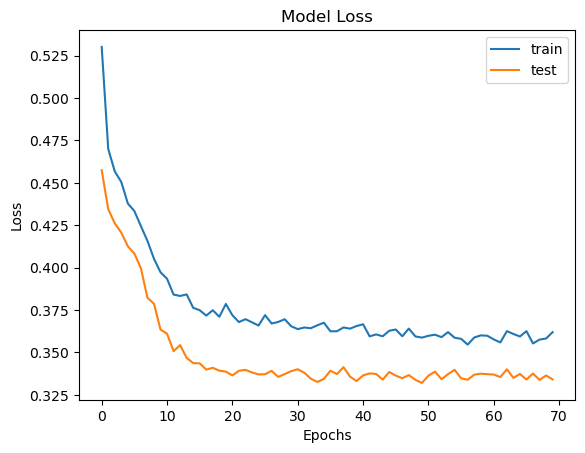

In [103]:
#visualizing the graph of loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

### Prediction & Evaluation :

In [104]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 2ms/step


In [105]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
confusion_matrix(y_test,y_pred)


array([[1513,   89],
       [ 200,  198]], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred)

0.8555

### Thank you